# Code Snippets

This Notebook is for snippets of code from my notes for the module CS5062

Trying to clump etivities 1, 2 & 3 together to learn.

key steps
1) Data Collection
2) Data Cleaning and Preprocessing
3) Descriptive Statistics
4) Univariate Analysis
5) Bivariate Analysis
6) Multivariate Analysis
7) Feature Engineering
8) Visualization
***
1) EDA Level 0 — Pure Understanding of Original Data
2) EDA Level 1 — Transformation of Original Data
3) EDA Level 2 — Understanding of Transformed Data

## Importing Modules and Dataset

In [28]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler




# Suppressing warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

current_palette = sns.color_palette('pastel')
sns.set_style("white")



In [29]:
# importing data

def load_dataset():
    '''
    Loads the bank dataset into a dataframe
    Returns the loaded dataframe from the folder you are working in
    '''
    df = pd.read_csv("./bank.csv")
    
    return df

#df = pd.read_csv('./bank_test.csv')

df = load_dataset()
df_original = df.copy()
FEATURES = list(df.columns.values)

# first inspection of the data
print('      Dataset      ')
print('------------------------')
print(f'Number of samples   : {df.shape[0]}')
print(f'Number of attributes: {df.shape[1]}')
print()


''' 
df.set_index('Day') # set the index if needed and working with datetimes.

#issue is data is set = "%d/%m/%Y" - this should make this ok.
df.index = pd.to_datetime(df2.index, format='mixed', dayfirst=True)'''
print()
%whos DataFrame # print list of dfs in memory


      Dataset      
------------------------
Number of samples   : 2000
Number of attributes: 17


Variable               Type         Data/Info
---------------------------------------------
CATEGORICAL_FEATURES   list         n=10
FEATURES               list         n=17
NUMERICAL_FEATURES     list         n=7
contingency_table      DataFrame    subscribed      no  yes\n<...>\nunemployed      21   48
corr_matrix            DataFrame                   age   bala<...>42143 -0.088487  1.000000
data                   list         n=42
df                     DataFrame           age           job <...>n[2000 rows x 17 columns]
df_original            DataFrame           age           job <...>n[2000 rows x 17 columns]
missing_data           DataFrame                Total  Percen<...>ubscribed      0     0.00
pivot_table            DataFrame    housing        no       y<...>s      0.325000  0.100000
stats                  DataFrame              Median     Mean<...>previous     2.0     2.56
su

| #  | Variable   | Description                                                                                                                                      | Type         | Categories                                                                                                                                                                     |
|----|:-----------|:------------------------------------------------------------------------------------------------------------------------------|:------------:|:--------------------------------------------------------------------------------------------------------------|
|    |            | **Bank client data**                                                                                                           |              |                                                                                                                 |
| 1  | age        | age                                                                                                                                     | numeric      |                                                                                                                                                                                 |
| 2  | job        | type of job                                                                                                                   | categorical  | "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"|
| 3  | marital    | marital status                                                                                          | categorical  | "married","divorced","single" (note: "divorced" means divorced or widowed)                                                                                                     |
| 4  | education  |                                                                                                         | categorical  | "unknown","secondary","primary","tertiary"                                                                                                                                     |
| 5  | default    | has credit in default?                                                                                  | binary       | "yes","no"                                                                                                                                                                      |
| 6  | balance    | average yearly balance, in euros                                                                        | numeric      |                                                                                                                                                                                |
| 7  | housing    | has housing loan?                                                                                       | binary       | "yes","no"                                                                                                                                                                      |
| 8  | loan       | has personal loan?                                                                                      | binary       | "yes","no"                                                                                                                                                                      |
|    |            | **Current campaign - last contact**                                            |                |                                                                                                                          |
| 9  | contact    | contact communication type                                                                              | categorical  | "unknown","telephone","cellular"                                                                                                                                                |
| 10 | day        | last contact day of the month                                                                           | numeric      |                                                                                                                                                                                |
| 11 | month      | last contact month of year                                                                              | categorical  | "jan", "feb", "mar", ..., "nov", "dec"                                                                                                                                          |
| 12 | duration   | last contact duration, in seconds                                                                       | numeric      |                                                                                                                                                                                |
|    |            | **Other attributes**                                                                   |                |                                                                                                                          |
| 13 | campaign   | number of contacts performed during this campaign and for this client                                   | numeric      | includes last contact                                                                                                                                                           |
| 14 | pdays      | number of days that passed by after the client was last contacted from a previous campaign              | numeric      | -1 means client was not previously contacted                                                                                                                                    |
| 15 | previous   | number of contacts performed before this campaign and for this client                                   | numeric      |                                                                                                                                                                                |
| 16 | poutcome   | outcome of the previous marketing campaign                                                              | categorical  | "unknown","other","failure","success"                                                                                                                                           |
|    |            | **Target attribute**                                                           |                |                                                                                                                          |
| 17 | subscribed  | has the client subscribed a term deposit?                                                               | binary       | "yes","no"                                                                                                                                                                     |  
<br>


## EDA Level 0 — Pure Understanding of Original Data

### Level 0 - Initial Look at data

In [30]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Example usage:
# Assuming df is your DataFrame
summary_df = column_summary(df)
display(summary_df)

col_name col_dtype  num_of_nulls  num_of_non_nulls  num_of_distinct_values                             distinct_values_counts
0          age   float64            12              1988                      68  {33.0: 95, 35.0: 90, 31.0: 87, 34.0: 84, 32.0:...
1          job    object            10              1990                      11  {'management': 461, 'technician': 348, 'blue-c...
2      marital    object             0              2000                       3  {'married': 1111, 'single': 674, 'divorced': 215}
3    education    object           104              1896                       3  {'secondary': 995, 'tertiary': 684, 'primary':...
4      default    object             0              2000                       2                            {'no': 1985, 'yes': 15}
5      balance     int64             0              2000                    1274  {0: 86, 1: 9, 272: 8, 303: 7, 655: 6, 417: 6, ...
6      housing    object             0              2000                       2                           {'no': 1037, 'yes': 963}
7         loan    object             0              2000                       2                           {'no': 1750, 'yes': 250}
8      contact    object           191              1809                       2               {'cellular': 1663, 'telephone': 146}
9          day     int64             0              2000                      31  {8: 204, 29: 187, 2: 156, 4: 148, 5: 104, 3: 9...
10       month    object             0              2000                      12  {'feb': 404, 'may': 333, 'jan': 245, 'apr': 20...
11    duration     int64             0              2000                     655  {200: 12, 90: 11, 219: 11, 187: 10, 263: 10, 1...
12    campaign     int64             0              2000                      11  {1: 1063, 2: 506, 3: 219, 4: 99, 5: 50, 6: 31,...
13       pdays     int64             0              2000                     363  {-1: 454, 182: 68, 181: 62, 92: 51, 91: 41, 18...
14    previous     int64             0              2000                      26  {0: 454, 1: 438, 2: 407, 3: 240, 4: 150, 5: 85...
15    poutcome    object           454              1546                       3     {'failure': 955, 'success': 444, 'other': 147}
16  subscribed    object             0              2000                       2                          {'no': 1000, 'yes': 1000}

In [31]:
# some initial probing into the data
#max_balance_subscribed_yes = df.loc[df['subscribed'] == 'yes', 'balance'].max()
#df.loc[:,'radius_mean':'fractal_dimension_mean'].describe() to take a slice of the features.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.head())
print(df.describe().T)
print(df.duplicated().sum())

    age          job   marital  education default  balance housing loan   contact  day month  duration  campaign  pdays  previous poutcome subscribed
0  32.0   technician    single   tertiary      no      392     yes   no  cellular    1   apr       957         2    131         2  failure         no
1  39.0   technician  divorced  secondary      no      688     yes  yes  cellular    1   apr       233         2    133         1  failure         no
2  59.0      retired   married  secondary      no     1035     yes  yes  cellular    1   apr       126         2    239         1  failure         no
3  47.0  blue-collar   married  secondary      no      398     yes  yes  cellular    1   apr       274         1    238         2  failure         no
4  54.0      retired   married  secondary      no     1004     yes   no  cellular    1   apr       479         1    307         1  failure         no
           count         mean          std    min     25%    50%     75%      max
age       1988.0  

In [32]:
# examine the numerical df features with target feature grouped. Consider using for imputation.
df.select_dtypes(include=['int64', 'float64']).groupby(df['subscribed']).mean()

age   balance     day  duration  campaign    pdays  previous
subscribed                                                                    
no          40.655903   942.862  12.364   206.696     1.957  185.400     2.362
yes         42.843531  1884.465  15.339   377.345     1.862  150.392     2.761

In [33]:
# Examine Missing data
# data.dropna(axis=0, inplace=True) # would drop rows if you wanted to.
df_total = df.isnull().sum().sort_values(ascending=False)
df_percent = 100.0*(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([df_total, df_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

Total  Percent
poutcome      454    22.70
contact       191     9.55
education     104     5.20
age            12     0.60
job            10     0.50
default         0     0.00
balance         0     0.00
housing         0     0.00
loan            0     0.00
day             0     0.00
month           0     0.00
duration        0     0.00
campaign        0     0.00
pdays           0     0.00
previous        0     0.00
marital         0     0.00
subscribed      0     0.00

There is something going on with the pdays = -1 and also the large number of poutcome blank responses.

### Level 0 - Numerical Features

Initial Examination and Comments on the Seven Numerical Features.

In [34]:
# Identify numerical columns
NUMERICAL_FEATURES = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Number of items in NUMERICAL_FEATURES:", len(NUMERICAL_FEATURES))
print(NUMERICAL_FEATURES)

Number of items in NUMERICAL_FEATURES: 7
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


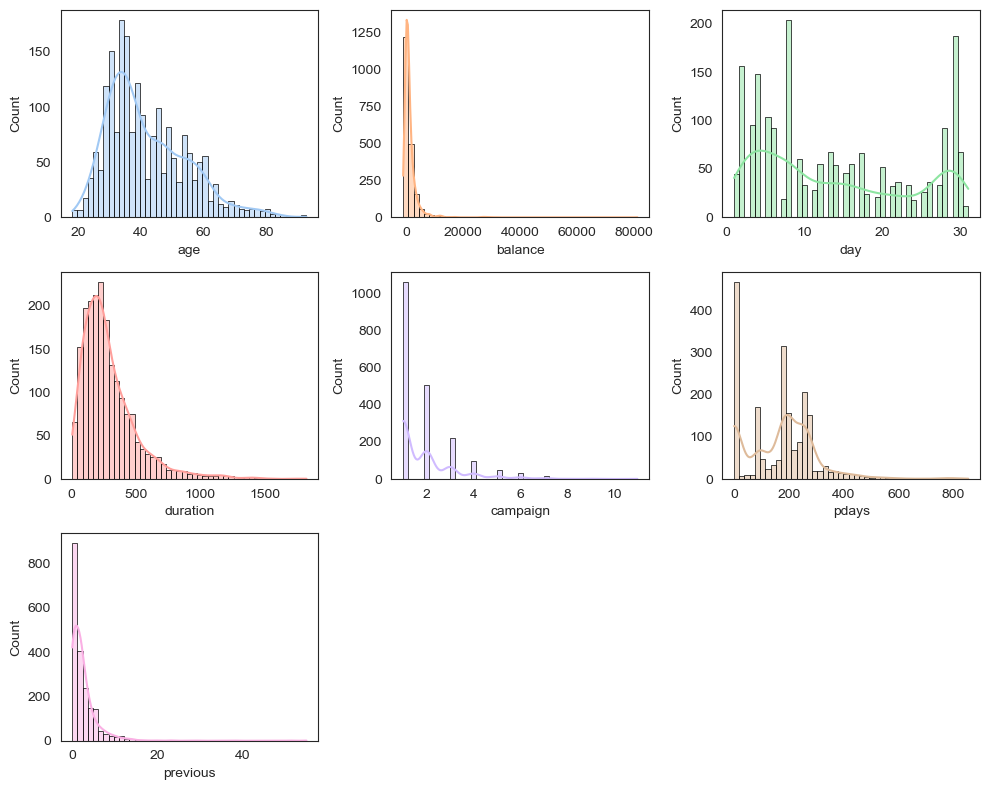

Skewness    Kurtosis
age        0.853921    0.390934
balance   11.461564  231.856074
day        0.403661   -1.285034
duration   2.045787    6.297587
campaign   2.320856    7.162811
pdays      0.920006    2.710735
previous   5.461168   59.746704

In [35]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, FEATURE in enumerate(NUMERICAL_FEATURES[:9]):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    
    sns.boxplot(x=df[FEATURE], ax=axs[row, col], palette=current_palette)
    axs[row, col].set_title(f'Boxplot: {FEATURE}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
for i, col in enumerate(NUMERICAL_FEATURES, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, stat="count", bins=45, linewidth=0.5, color=current_palette[i-1], edgecolor="black")
    plt.tight_layout()

plt.show()

skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)
pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

In [36]:
#Quick examination of the mean and median of the numerical columns to compare the two
stats = pd.DataFrame({'Median': df.median(numeric_only=True), 'Mean': df.mean(numeric_only=True).round(2)})

print(stats)

          Median     Mean
age         38.0    41.75
balance    551.0  1413.66
day         12.0    13.85
duration   236.0   292.02
campaign     1.0     1.91
pdays      182.0   167.90
previous     2.0     2.56


#### Numerical Features Observations

From the above distributions:

- **age**<br>
12 missing values. Mean: 41 years, median: 38 years, minimum: 18 years, maximum: 93 years. The difference between median and maximum suggests the presence of outliers. These outliers seem relevant to me.
<br>
<br>
- **balance**<br>
The mean balance is 1,413. However, the difference between mean and median (551) is high. That suggests a skewed distribution and presence of outliers. We also have a a high value of standard deviation (3131) and a striking difference between maximum and mean (or median). That strengthens the case for our suspicion.
<br>
<br>
- **duration**<br>
This attribute represents the last contact duration in seconds. However, there is an important note in the dataset description: this attribute highly affects the output target (e.g., **if duration=0 then subscribed='no'**). The duration is not known before a call is performed. Also, after the end of the call, the outcome is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>
<br>
- **campaign**<br>
Maximum is 11 and mean is 1.9. Again, there are going to be outlied data.
<br>
<br>
- **pdays**
<br>
This attribute represents the number of days that passed after the client was last contacted from a previous campaign. The problem here is that the value of "-1" indicates that the client was not previously contacted. Consequently, those samples with a value of "-1" obviously have a corresponding value of 0 in the "previous" attribute (the number of contacts performed before this campaign and for this client). We will also have to deal with this later in task 2.
<br>
<br>
- **day**<br>
This is an interesting attribute describing the day of the month when the last contact with the client was made. The problem is that months have different numbers of days, which suggests that we should perhaps encode this attribute as a **cyclical feature**. We'll see to that later in task 2.
<br>
<br>
- **Month**<br>
Also, unlike the attribute Day, the attribute Month is not included in the numerical statistics. This is because Month is represented as "text" in the dataset. To maintain consistency, we will encode Month as a numerical attribute during the data preparation task.
<br>
<br>

#### Numerical Feature Correlation

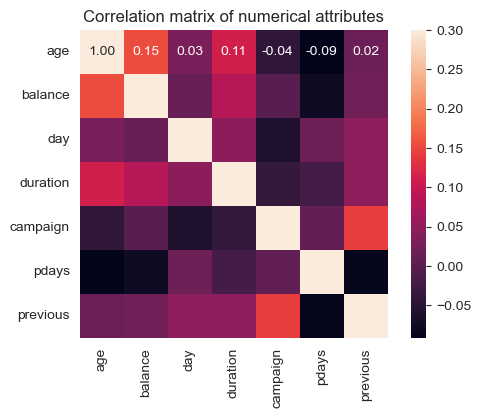

In [37]:
# Correlation matrix
corr_matrix = df.dropna().corr(numeric_only=True) # drop na for initial observations
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmax=.3, square=True, linecolor="black")
plt.title('Correlation matrix of numerical attributes')
plt.show()

In [38]:
# plot the numeric columns but split by target variable
#sns.pairplot(data=df, corner=True)
#sns.pairplot(data=df, corner=True, hue="subscribed", palette=current_palette)
#plt.show()


g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
plt.show()

In [39]:
g = sns.PairGrid(df, hue="subscribed")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.map_upper(sns.kdeplot)
g.add_legend()
plt.show()

#### Further Observations

### Level 0 - Categorical Features

In this section I will inspect the categorical items in order to explore how we may impute the missing values, and how I may encode, scale and transform the data and deal with outliers.

In [40]:
# Identify Categorical Features
CATEGORICAL_FEATURES = df.select_dtypes(include=['object']).columns.tolist()
print("Number of items in CATEGORICAL_FEATURES:", len(CATEGORICAL_FEATURES))
print(CATEGORICAL_FEATURES)

Number of items in CATEGORICAL_FEATURES: 10
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [41]:
df.describe(include=['object']).T #describing the categorical varibles

count unique         top  freq
job         1990     11  management   461
marital     2000      3     married  1111
education   1896      3   secondary   995
default     2000      2          no  1985
housing     2000      2          no  1037
loan        2000      2          no  1750
contact     1809      2    cellular  1663
month       2000     12         feb   404
poutcome    1546      3     failure   955
subscribed  2000      2          no  1000

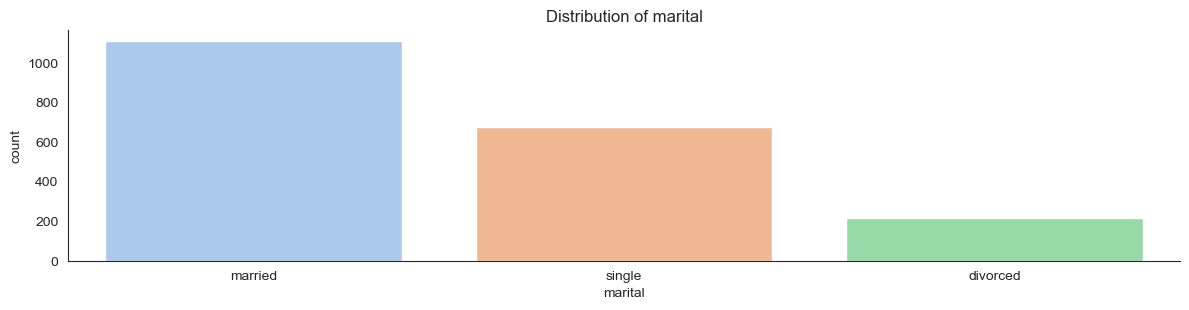

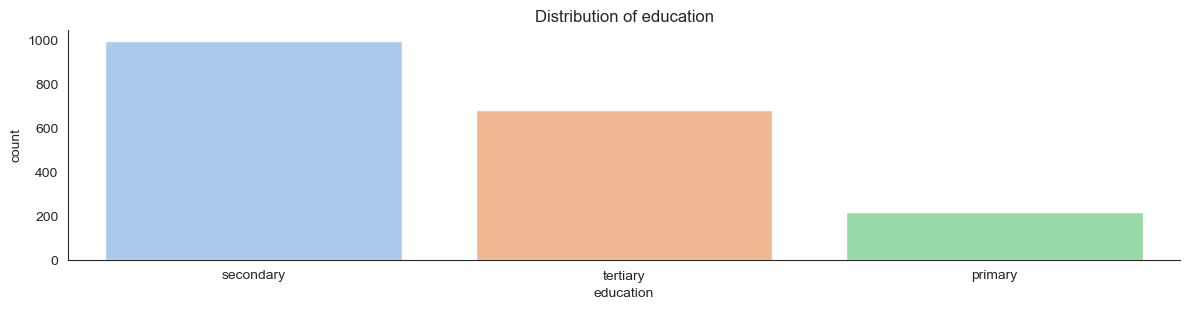

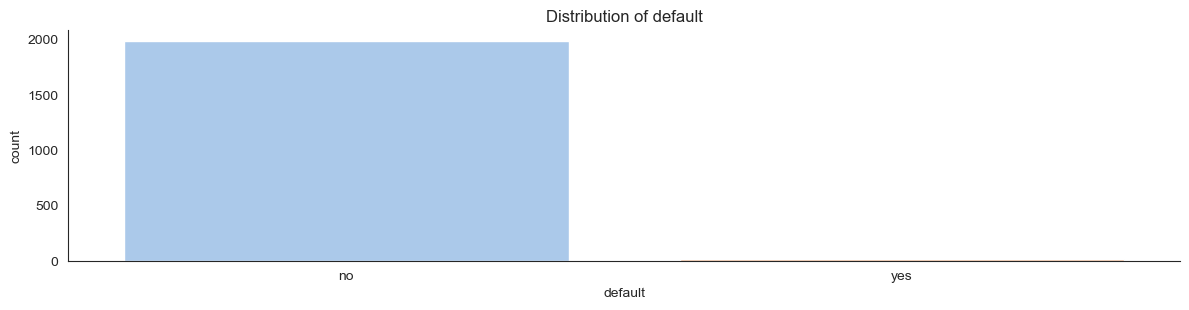

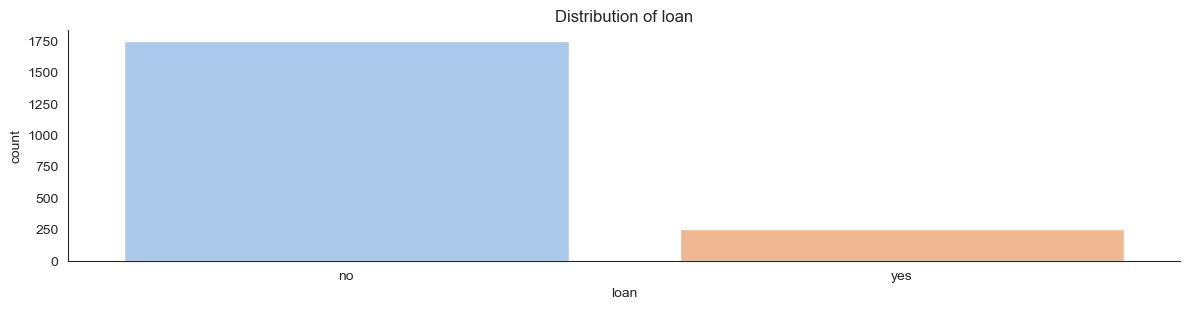

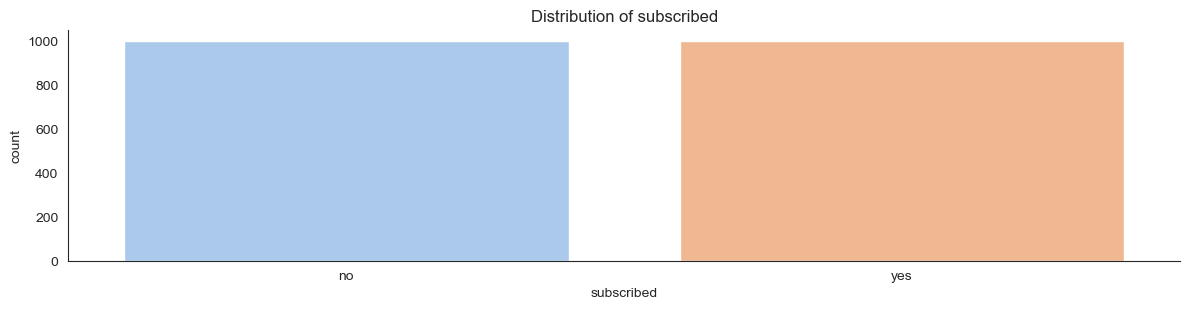

In [42]:
# Plot categorical attribute stats in descending order
for cat_column in CATEGORICAL_FEATURES:
    # Get the value counts of the column and sort them in descending order
    value_counts_desc = df[cat_column].value_counts().sort_values(ascending=False)
    
    # Plot the count plot with the sorted order
    sns.catplot(x=cat_column, kind='count', data=df, order=value_counts_desc.index, palette=current_palette, height=3, aspect=4)
    plt.title(f'Distribution of {cat_column}')
    plt.show()


In [43]:
# Create an empty DataFrame to store the value counts
value_counts_df = pd.DataFrame(columns=['Feature', 'Value', 'Count'])
data = []

# Loop through each categorical feature
for feature in CATEGORICAL_FEATURES:
    # Calculate value counts for the current feature
    counts = df[feature].value_counts()
    
    # Loop through each value count
    for value, count in counts.items():
        # Append the feature, value, and count to the list as a dictionary
        data.append({'Feature': feature, 'Value': value, 'Count': count})

# Create a DataFrame from the list of dictionaries
value_counts_df = pd.DataFrame(data)
print(value_counts_df.to_string(index=False))

   Feature         Value  Count
       job    management    461
       job    technician    348
       job   blue-collar    298
       job        admin.    247
       job      services    165
       job       retired    162
       job       student     96
       job    unemployed     69
       job self-employed     64
       job  entrepreneur     45
       job     housemaid     35
   marital       married   1111
   marital        single    674
   marital      divorced    215
 education     secondary    995
 education      tertiary    684
 education       primary    217
   default            no   1985
   default           yes     15
   housing            no   1037
   housing           yes    963
      loan            no   1750
      loan           yes    250
   contact      cellular   1663
   contact     telephone    146
     month           feb    404
     month           may    333
     month           jan    245
     month           apr    205
     month           jul    167
     mon

#### Categorical Feature Observations


In [44]:
sns.catplot(data=df, x="education", y="age", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="education", y="age", hue='subscribed', size=2)
plt.show()

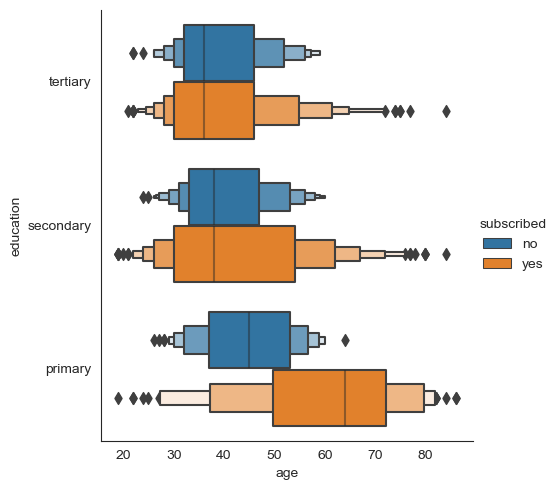

In [45]:
sns.catplot(data=df, x="age", y="education", hue="subscribed", kind="boxen")
plt.show()

#### Categorical Feature Correlation


In [46]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['job'], df['subscribed'])

# Display the contingency table
print(contingency_table)

subscribed      no  yes
job                    
admin.         117  130
blue-collar    221   77
entrepreneur    30   15
housemaid       15   20
management     210  251
retired         26  136
self-employed   29   35
services       115   50
student          9   87
technician     204  144
unemployed      21   48


We can compare one of the target features, the binary "subscribed" column as a hue and applied to the numerical features.

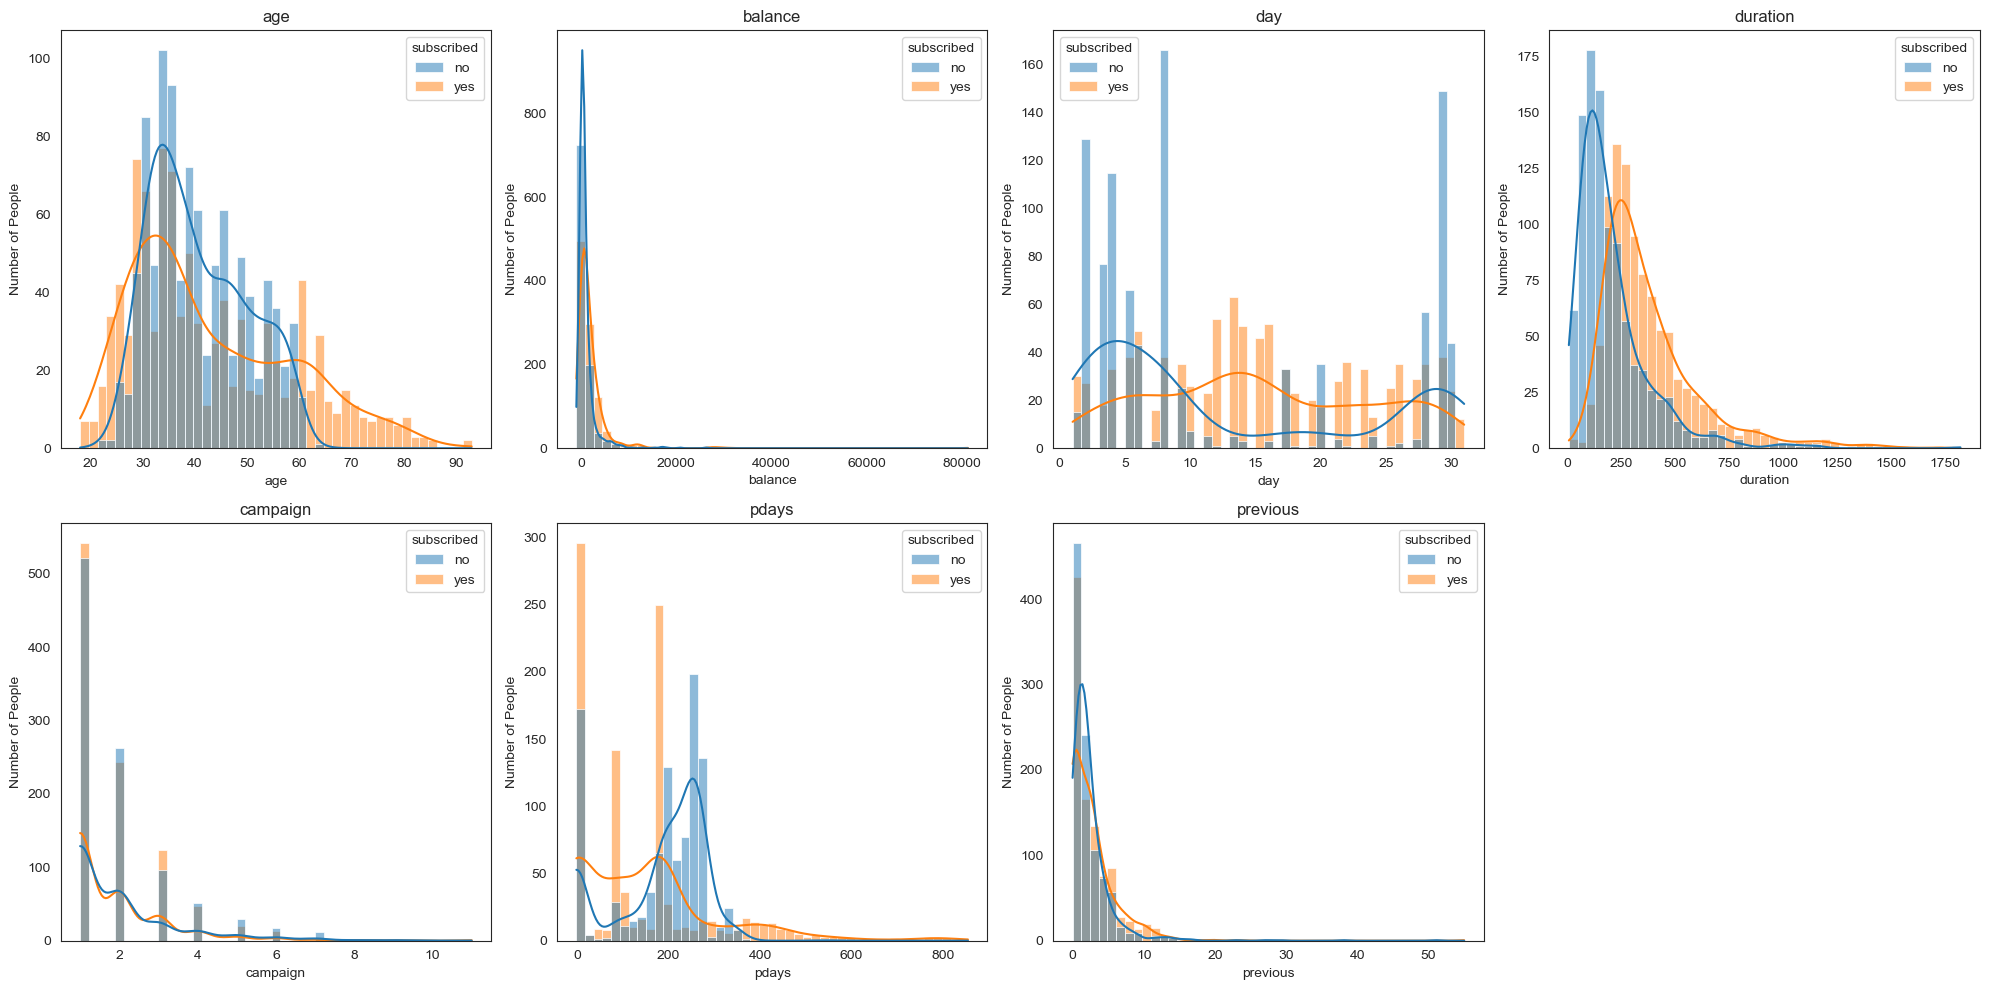

In [47]:
fig, x = plt.subplots(2, 4, figsize=(20, 10))  

# Flatten the array so we can easily iterate over it
x = x.flatten()

# Calculate the maximum number of iterations based on the minimum of the number of numerical features and the number of subplots
num_iterations = min(len(NUMERICAL_FEATURES), len(x))

for i in range(num_iterations):
    col = NUMERICAL_FEATURES[i]
    
    sns.histplot(data=df, x=col, hue='subscribed', ax=x[i], bins=45, kde=True, stat="count", linewidth=0.5, color=current_palette[i])
    x[i].set_title(col)
    x[i].set_xlabel(col) 
    x[i].set_ylabel('Number of People') 

# Hide the unused subplots
for j in range(num_iterations, len(x)):
    x[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Further Observations

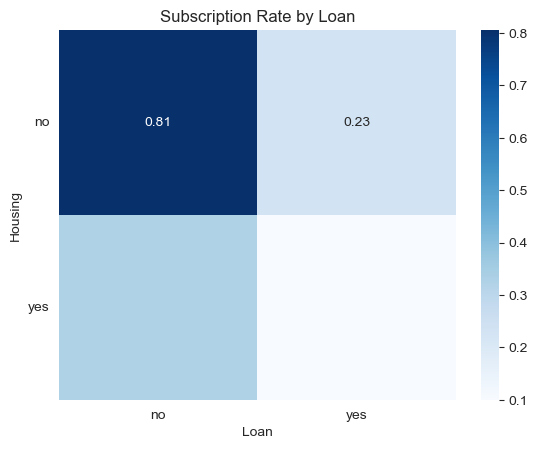

In [48]:
# Creating a pivot table
pivot_table = df.pivot_table(values='subscribed',
                                index='loan', columns = 'housing',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
# Generate a heatmap using seaborn
sns.heatmap(pivot_table, annot=True, cmap='Blues')

# Setting the titles and labels
plt.title('Subscription Rate by Loan')
plt.xlabel('Loan')
plt.ylabel('Housing')
plt.yticks(rotation=0);

## EDA Level 1 — Transformation of Original Data

In [49]:
# calling again from above
summary_df = column_summary(df)
display(summary_df)

col_name col_dtype  num_of_nulls  num_of_non_nulls  num_of_distinct_values                             distinct_values_counts
0          age   float64            12              1988                      68  {33.0: 95, 35.0: 90, 31.0: 87, 34.0: 84, 32.0:...
1          job    object            10              1990                      11  {'management': 461, 'technician': 348, 'blue-c...
2      marital    object             0              2000                       3  {'married': 1111, 'single': 674, 'divorced': 215}
3    education    object           104              1896                       3  {'secondary': 995, 'tertiary': 684, 'primary':...
4      default    object             0              2000                       2                            {'no': 1985, 'yes': 15}
5      balance     int64             0              2000                    1274  {0: 86, 1: 9, 272: 8, 303: 7, 655: 6, 417: 6, ...
6      housing    object             0              2000                       2                           {'no': 1037, 'yes': 963}
7         loan    object             0              2000                       2                           {'no': 1750, 'yes': 250}
8      contact    object           191              1809                       2               {'cellular': 1663, 'telephone': 146}
9          day     int64             0              2000                      31  {8: 204, 29: 187, 2: 156, 4: 148, 5: 104, 3: 9...
10       month    object             0              2000                      12  {'feb': 404, 'may': 333, 'jan': 245, 'apr': 20...
11    duration     int64             0              2000                     655  {200: 12, 90: 11, 219: 11, 187: 10, 263: 10, 1...
12    campaign     int64             0              2000                      11  {1: 1063, 2: 506, 3: 219, 4: 99, 5: 50, 6: 31,...
13       pdays     int64             0              2000                     363  {-1: 454, 182: 68, 181: 62, 92: 51, 91: 41, 18...
14    previous     int64             0              2000                      26  {0: 454, 1: 438, 2: 407, 3: 240, 4: 150, 5: 85...
15    poutcome    object           454              1546                       3     {'failure': 955, 'success': 444, 'other': 147}
16  subscribed    object             0              2000                       2                          {'no': 1000, 'yes': 1000}

#### Level 1 - Impute Missing Data

##### Impute missing values with the mode

In [50]:
# Find the mode (most frequent value) of the "job" attribute
mode_job = df['job'].mode()[0]
print(f'The most frequent job is: {mode_job}')

# Fill missing values with the mode
df['job'] = df['job'].fillna(mode_job)
print(f'Missing values filled in with "{mode_job}"')

The most frequent job is: management
Missing values filled in with "management"


##### Using Cross Tab to impute missing values

By using a crosstab, i can select the most common education for each job, and then impute back this job to fill in the missing education value.

In [51]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['job'], df['education'])

# Display the contingency table
print(contingency_table)

education      primary  secondary  tertiary
job                                        
admin.              10        194        35
blue-collar         93        185        10
entrepreneur         4         18        22
housemaid           16         12         7
management          11         40       392
retired             53         77        22
self-employed        0         15        47
services            12        135        11
student              4         59        16
technician           9        217       102
unemployed           5         43        20


In [52]:
print(40*'-')
print(f'Attribute stats before imputation: \033[1meducation\033[0m')
print()
print(df['education'].value_counts(dropna=False))
print()

----------------------------------------
Attribute stats before imputation: education

education
secondary    995
tertiary     684
primary      217
NaN          104
Name: count, dtype: int64



In [53]:
# Find the mode value for each "job" - for the imputer
mode_values = {}
for job in contingency_table.index:
    mode_values[job] = contingency_table.loc[job].idxmax()

# Impute missing values in "education" attribute
for index, row in df.iterrows():
    if pd.isnull(row['education']):
        job = row['job']
        mode_education = mode_values[job]
        df.at[index, 'education'] = mode_education
    

In [54]:
# examine education and impute with most frequent
print(40*'-')
print(f'Attribute stats after imputation: \033[1meducation\033[0m')
print()
print(df['education'].value_counts(dropna=False))
print()

----------------------------------------
Attribute stats after imputation: education

education
secondary    1068
tertiary      715
primary       217
Name: count, dtype: int64



##### impute data with the mean

In [55]:
# Calculate the mean value as a rough first order approximation
#df['age'].fillna(df['age'].mean(), inplace=True)  ## first attempt

# better approximation version

# replace with the mean age for each job group
mean_age_by_job = df.groupby('job')['age'].transform('mean')

# Fill NaN values in the 'age' column with the corresponding mean age for each job group
df.loc[:, 'age'] = df['age'].fillna(mean_age_by_job)

# print the stats again to see if they have changed
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

##### label missing data as unknown

In [56]:
# Replace missing values with 'unknown' - 2 cols left contact and poutcome
for col in CATEGORICAL_FEATURES:
    df[col].fillna('unknown', inplace=True)

In [57]:
#df_original = df_original.drop((missing_data[missing_data['Total'] > 1]).index,1) # drop the whole feature if data is missing
#df_original = df_original.drop(df_original.loc[df_original['Electrical'].isnull()].index) # just drop the instance.

# Missing data
df_total = df.isnull().sum().sort_values(ascending=False)
df_percent = 100.0*(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([df_total, df_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

Total  Percent
age             0      0.0
day             0      0.0
poutcome        0      0.0
previous        0      0.0
pdays           0      0.0
campaign        0      0.0
duration        0      0.0
month           0      0.0
contact         0      0.0
job             0      0.0
loan            0      0.0
housing         0      0.0
balance         0      0.0
default         0      0.0
education       0      0.0
marital         0      0.0
subscribed      0      0.0

### Level 1 - Creating New Features

#### Age Discretization

In [58]:
# Define bin edges for age
age_bins = [0, 25, 35, 45, 55, 65, 75, 100]

# Define labels for the bins
age_bin_labels = ['0-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75+']

# Create age bins
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_bin_labels)

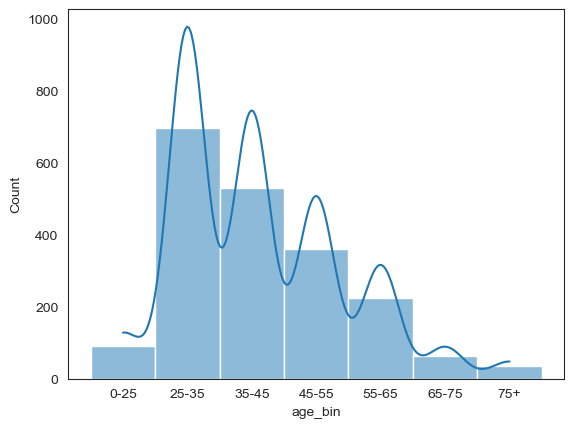

In [59]:
sns.histplot(data=df, x="age_bin", kde=True)
plt.show()

These seem to have a much better distribution.

#### Creating Binary Features

- **pdays** - new feature **contact_before** to reflect the value of "-1" (no contact before) - binarization
<br>
<br>

As we know from the description, the value of "-1" in **pdays** means that there was no contact before, while values<>-1 mean "how many days since the last contact". To reflect this discrepancy, I am going to create another new feature, a binary indicator. After that, I am going to change all values of "-1" to "0" to be prepared for a further rescaling step.

In [60]:
count_minus_one = df['pdays'].value_counts().get(-1, 0)

print("Number of occurrences of -1 in the 'pdays' column:", count_minus_one)

Number of occurrences of -1 in the 'pdays' column: 454


In [61]:
# A new binary indicator for pdays - a new feature named contact_before
df['contact_before'] = (df['pdays'] != -1).astype(int)

# Updating the value of "-1" to "0"
df['pdays'] = df['pdays'].replace(-1, 0)

In [62]:
# Insert new binary feature
#df['wedded'] = df['marital'].apply(lambda x: x in ['married', 'divorced'])

#### Mapping Ordinal Features

In [63]:
# Education is ordinal, below I map each value to its numerical value

mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3,
}
# Replace the old values with the new ordinal values
df['education'] = df['education'].replace(mapper)

#### One-Hot Encoding

I will one hot encode in the pipeline this time.

In [64]:
# one-hot encode all categorical columns

#df = pd.get_dummies(df, columns=CATEGORICAL_FEATURES,
#                        dummy_na=True, 
#                        dtype=int,
#                        drop_first=True)
#
#df.sort_values('subscribed_yes').tail(5)

#### Encode Cyclical Variables

I will encode the cyclical variables in the pipeline this time.

In [65]:
# Creating a dictionary assigning each month its max number of days
month_to_days = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}

months = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
#df['month'] = df['month'].map(months)

# Calculate the sin and cos for day
#df['sin_day'] = np.sin(2 * np.pi * df['day'] / df['month'].map(month_to_days))
#df['cos_day'] = np.cos(2 * np.pi * df['day'] / df['month'].map(month_to_days))


# For the month 
#df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
#df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
# Drop the day and month columns
#df = df.drop(['day', 'month'], axis=1)

### Level 1 - Scaling the Data

In [66]:
#standardizing data
#how many standard deviations away from the mean the original 'balance' values are.
# 3 Standard Deviations from the Mean: 99.7%
# larger samples, perhaps a value of 4 standard deviations (99.9%)

# Convert the 'balance' column to a numpy array
#balance_array = df['balance'].values

# Reshape the array to a 2D array
#balance_2d = balance_array[:, np.newaxis]

# Scale the 'balance' column using StandardScaler
#balance_scaled = StandardScaler().fit_transform(balance_2d)

# Extract the lowest and highest scaled values
#low_range = balance_scaled[balance_scaled[:, 0].argsort()][:10]
#high_range = balance_scaled[balance_scaled[:, 0].argsort()][-10:]

#print('outer range (low) of the distribution:')
#print(low_range)
#print('\nouter range (high) of the distribution:')
#print(high_range)

# every above 3 really needs to be thrown away.

#df['balance_scaled'] = balance_scaled

# Display the DataFrame to verify the addition of the new column
#df.sort_values('balance_scaled').tail(8)


In [68]:
'''Gaussian Standard Deviation Outliers analysis'''
#data_mean, data_std = np.mean(df['balance_scaled']), np.std(df['balance_scaled'])
#print(data_mean, data_std)

# identify outliers now that I have standardized
#cut_off = data_std * 4         # using 4 stds

#lower, upper = (data_mean - cut_off), (data_mean + cut_off)
#print(lower, upper)
''' this is a long winded way of saying plusminus 4 which is 4 standard deviations.'''


# identify outliers
#outliers = [x for x in df['balance_scaled'] if x < lower or x > upper]

# remove outliers
#outliers_removed = [x for x in df['balance_scaled'] if x > lower and x < upper]

#print('Identified outliers: %d' % len(outliers))
#print('Non-outlier observations: %d' % len(outliers_removed))

' this is a long winded way of saying plusminus 4 which is 4 standard deviations.'

In [70]:
'''IQR method of dealing with outliers'''
# calculate interquartile range
#q25, q75 = np.percentile(df['balance_scaled'], 25), np.percentile(df['balance_scaled'], 75)
#iqr = q75 - q25
#print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
#cut_off = iqr * 3
#lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
#outliers = [x for x in df['balance_scaled'] if x < lower or x > upper]
#print('Identified outliers: %d' % len(outliers))
# remove outliers
#outliers_removed = [x for x in df['balance_scaled'] if x >= lower and x <= upper]
#print('Non-outlier observations: %d' % len(outliers_removed))

# Wow this has 66 more outliers in just 1000 data points with a cutoff of 1.5, and half that with a value of 3.

'IQR method of dealing with outliers'

Function for identifying outliers another way

In [77]:
def find_outliers(series, scale=3, quantiles=(0.25, 0.75)):
    
    Q1, Q3 = series.quantile(quantiles)

    IQR = Q3 - Q1
    lower_bound = Q1 - scale * IQR
    upper_bound = Q3 + scale * IQR

    return (lower_bound, upper_bound)

def describe_outliers(df,scale=3, quantiles=(0.25, 0.75)):
 
    outlier_summary = {}

    for column in df.select_dtypes(include=['int', 'float']):
        series = df[column]

        (lower_bound, upper_bound) = find_outliers(series, scale, quantiles)

        # Identify and count outliers
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        outlier_summary[column] = len(outliers)

    return outlier_summary

describe_outliers(df) # to do all the columns at the same time

# {'age': 14, 'balance': 76, 'balance_scaled': 76} with 1.5IQR
# {'age': 0, 'balance': 34, 'balance_scaled': 34} with 3IQR


def drop_outliers(df, scale=1.5, quantiles=(0.25, 0.75)):
    '''Can use this to drop instances of outliers in the df'''
    cleaned_df = df.copy()  # Create a copy of the original DataFrame

    for column in df.select_dtypes(include=['int', 'float']):
        series = df[column]
        (lower_bound, upper_bound) = find_outliers(series, scale, quantiles)

        # Drop outliers
        outliers_index = (series < lower_bound) | (series > upper_bound)
        cleaned_df = cleaned_df[~outliers_index]

    return cleaned_df

cleaned_df = drop_outliers(df)


#describe_outliers(cleaned_df) # now check outliers again
describe_outliers(df) # to do all the columns at the same time



{'age': 0,
 'education': 0,
 'balance': 75,
 'day': 0,
 'duration': 28,
 'campaign': 63,
 'pdays': 8,
 'previous': 70,
 'contact_before': 454}

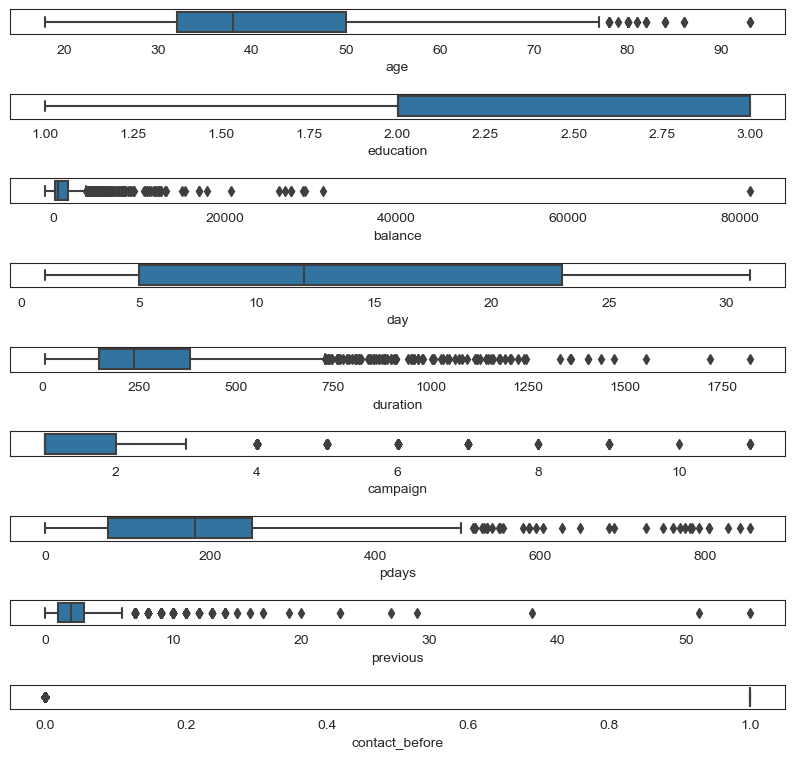

In [78]:
# Examine the numerical features again to check for outliers.

fig, axes = plt.subplots(len(df.select_dtypes(include=[np.number]).columns), 1, figsize=(10, 5) )
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df, x=col, orient='h', ax=axes[i])

plt.subplots_adjust(bottom=1.1, top=2.5, hspace=2.4)
plt.show()

Note: Also explore various types of transformations, square, cube and log transformers, insert notes on each here, imputers, and scalers if using a pipeline.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1988 non-null   float64
 1   job             1990 non-null   object 
 2   marital         2000 non-null   object 
 3   education       1896 non-null   float64
 4   default         2000 non-null   object 
 5   balance         2000 non-null   int64  
 6   housing         2000 non-null   object 
 7   loan            2000 non-null   object 
 8   contact         1809 non-null   object 
 9   day             2000 non-null   int64  
 10  month           2000 non-null   object 
 11  duration        2000 non-null   int64  
 12  campaign        2000 non-null   int64  
 13  pdays           2000 non-null   int64  
 14  previous        2000 non-null   int64  
 15  poutcome        1546 non-null   object 
 16  subscribed      2000 non-null   object 
 17  contact_before  2000 non-null   i

### Level 1 - Create a Pipeline

and an additional section on splitting data into test and train data, and some notes on data leakage.

I am going to import the dataframe again from scratch.

In [ ]:
class RemoveOutliersTransformer(BaseEstimator, TransformerMixin):
    '''Remove Outliers from a Numerical Feature using IQR times 1.5'''
    def __init__(self, lower_quantile=0.25, upper_quantile=0.75, iqr_scale=1.5):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
        self.iqr_scale = iqr_scale
    
    def fit(self, X, y=None):
        # Compute the IQR
        Q1 = np.percentile(X, self.lower_quantile * 100, axis=0)
        Q3 = np.percentile(X, self.upper_quantile * 100, axis=0)
        self.iqr_ = Q3 - Q1
        
        # Compute the bounds
        self.lower_bound_ = Q1 - self.iqr_scale * self.iqr_
        self.upper_bound_ = Q3 + self.iqr_scale * self.iqr_
        return self
    
    def transform(self, X, y=None):
        # Clip the outliers to the boundary
        X_clipped = np.clip(X, self.lower_bound_, self.upper_bound_)
        return X_clipped

    def get_feature_names_out(self, input_features=None):
        return input_features

class CyclicalEncoder(BaseEstimator, TransformerMixin): 
    '''Encode Cyclical Features for Month of Year'''
    def __init__(self, month_period, day_period):
        self.month_period = month_period
        self.day_period = day_period

    def fit(self, X, y=None):
        return self    
    
    def month_to_num(self, month):
        months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        return months.index(month.lower()) + 1

    def create_cyclical_features(self, X, col, max_val):
        X[col + '_sin'] = np.sin(2 * np.pi * X[col] / max_val)
        X[col + '_cos'] = np.cos(2 * np.pi * X[col] / max_val)
        return X
    
    def transform(self, X):
        X = X.copy()
        X['month_num'] = X['month'].apply(self.month_to_num)
        X = self.create_cyclical_features(X, 'month_num', 12)
        X = self.create_cyclical_features(X, 'day', self.day_period)
        X_transformed = X.drop(columns=['month', 'month_num', 'day'], axis=1)
        return X_transformed
    
    def get_feature_names_out(self, input_features=None):
        return ['month_sin', 'month_cos', 'day_sin', 'day_cos']
    

In [ ]:
# use OrdinalEncoder for the age_bins

# age_bin - I am going to use the OrdinalEncoder instead
age_bin_encoder = df(categories=[age_bin_labels])
df.age_bin = age_bin_encoder.fit_transform(df.age_bin.values.reshape(-1, 1))


# do all the  numerical features get RobustScaler?
'balance','campaign','previous','pdays','duration'

# do all the numerical features get log transformation?



This is a short section where I look at the numerical features and plot them after they have been scaled and transformed.

### Level 1 - Cluster Analysis

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [ ]:
df['subscribed'] = df['subscribed'].map({'yes': 1, 'no': 0})
X = df[['pdays', 'balance']]
y = df['subscribed']


In [ ]:
sns.scatterplot(data=df, x='pdays', y='balance', hue='subscribed')
plt.show()

In [ ]:

svc_clf = make_pipeline( 
                        SVC(kernel='linear', C=0.1))
svc_clf.fit(X, y)

display = DecisionBoundaryDisplay.from_estimator(svc_clf, X, 
                                                 grid_resolution=10,
                                                 xlabel="x",
                                                 ylabel="y")

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='w')
plt.title("Decision Boundary")
plt.show()

predicted_labels = svc_clf.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, predicted_labels)
print("Accuracy:", accuracy)



## Appendix One - Visualization & Unused Charts

In [ ]:
df = load_dataset()

# Distribution of jobs
sns.countplot(data=df, x='job')
plt.xticks(rotation=45)
plt.title("Job distribution")
plt.ylabel("Number of samples")
plt.xlabel("")
plt.show()

# Distribution of jobs with hue for a binary
sns.countplot(data=df, x='job', hue='subscribed', edgecolor='black')
plt.title('Job distribution against Subscribed')
plt.xlabel('Job')
plt.ylabel('Number of samples')
plt.xticks(rotation=45)
plt.show()

In [ ]:

#df_original['balance'].hist(bins=80, color='skyblue', edgecolor='black') # you can vary the bins to get a better distribution
sns.histplot(df["balance"], kde=True)
plt.title('Histogram Distribution of Balance Feature')
plt.xlabel('Account Balance')
plt.ylabel('Number of Records')
plt.show()

In [ ]:
# Age distribution, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# I am using the square root of the total number of data points to calculate the number of bins
# (square root of 2000 = 45)
sns.histplot(df['balance'], bins=45, kde=True, ax=ax[0])
ax[0].set_title('balance distribution')
ax[0].set_ylabel('Number of samples')

sns.boxplot(y=df['balance'], ax=ax[1])
ax[1].set_title('balance boxplot')
ax[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Perform univariate analysis on numerical columns
for column in NUMERICAL_FEATURES:
    # For continuous variables
    if len(df[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
        plt.figure(figsize=(6, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:  # For discrete or ordinal variables
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=column, data=df)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points')
        plt.show()

In [ ]:
# Categorical feature plots  - # 10 features
'''CHECK THE OTHER EXAMPLES TO GET SOMETHING MORE READABLE'''
fig, axs = plt.subplots(5, 2, figsize=(20, 12))
axs = axs.flatten()

for i, category in enumerate(CATEGORICAL_FEATURES):
    current_palette = sns.color_palette(current_palette, len(df[category].unique()))
    sns.countplot(y=category, data=df, ax=axs[i], order=df[category].value_counts().index, hue=df[category], palette=current_palette)

    axs[i].set_title(f'{category} Distribution')
    #axs[i].set_xlabel('')
    #axs[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Violinplot where you can group by one categorical over the range of another
# Can group with an x axis which has two or three options.
sns.violinplot(data=df_original, x='education', y='age', width=0.9)
plt.title('Violin plot of Yearly Balance grouped by Education')
plt.axhline(df['age'].median(), color='r', linestyle='-', linewidth=0.5)
plt.axhline(df['age'].quantile(0.75), color='y', linestyle='-', linewidth=0.5)
plt.axhline(df['age'].quantile(0.25), color='y', linestyle='-', linewidth=0.5)
plt.show()

sns.violinplot(data=df_original, x='subscribed', y='balance')
plt.title('Violin plot of Balance against subscribed')
plt.show()

sns.violinplot(data=df_original, x='education', y='age', hue='subscribed', split=True) # this is combining the above two into the one plot
plt.title('Violin plot of the two above plots combined')
plt.show()


In [ ]:
# boxplot, with the whiskers showing the outliers well.
sns.boxplot(data=df_original, x='education', y='balance', width=0.6, palette=current_palette)
plt.title('Box plot of Yearly Balance grouped by Education')
plt.show()

In [ ]:
# calculate correlations for the numerical features.
sns.heatmap(df_original.corr(method='spearman', numeric_only=True), annot=False, fmt=".2f", cmap=sns.color_palette('Set2'), linewidth=.5)
plt.show()

# this now has more features after the encoding above.
sns.heatmap(df.corr(method='spearman', numeric_only=True), cmap='coolwarm', linewidth=.5)
plt.title('Spearman Correlation Matrix for newly encoded df')
plt.show()

In [ ]:
print(df.corr()['subscribed_yes'].sort_values(ascending=False))

In [ ]:
# continuing looking at the correlations
df.corr()['subscribed_yes'].sort_values(ascending=False).drop('subscribed_yes').plot(kind='bar')

plt.title('Correlation between when subscribed and other features')
plt.ylabel('Correlation')
plt.xlabel('Features')

plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.5, color='gray')

plt.show()

In [ ]:
# calculate a pairplot giving a number of the columns
sns.pairplot(data=df_original, corner=True, hue="subscribed") # default is to use all numeric columns
plt.show()

# there might be too much going on here for the hue if there's many numeric columns.
# the diagonals are essentially histogram plots of themselves, the others scatterplots

In [ ]:
ax_array = df.hist(bins=50)

# Rotate x-axis labels and adjust the layout
for ax_row in ax_array:
    for ax in ax_row:
        ax.set_xlabel(ax.get_xlabel(), rotation=45)
        ax.set_ylabel(ax.get_ylabel(), rotation=0)


plt.tight_layout()
plt.show()

df_original.iloc[:, 0:9].hist(bins=50) # this seems like a worse version of the same thing.
plt.show()

In [ ]:
# This is just a worse version of above
#df_original.boxplot() # can plot multiple boxplots at the same time.
#plt.show()

In [ ]:
#histogram and normal probability plot after scaling.
sns.histplot(df["balance_scaled"], kde=True, common_norm=True)
# this is just one histplot
plt.show()

In [ ]:
features_to_plot = NUMERICAL_FEATURES + ['balance_scaled'] # have to addin new features

plt.figure(figsize=(10, 8))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i) # this time it didn't work as this is set to expand to a 3x3 grid
    sns.histplot(df[col], kde=True, stat="count", linewidth=0.5, color=current_palette[i-1]) # or can do density
    plt.tight_layout()

plt.show()

### Apendix One
Cyclical encoding

In [ ]:
# examing some sum values which may be missing in greater detail.
sum_value_counts = []

# Loop through all features this time
for feature in CATEGORICAL_FEATURES:
    # Calculate the sum of value counts for the current feature
    feature_sum = df[feature].value_counts().sum()
    
    # Append the sum to the list
    sum_value_counts.append({'Feature': feature, 'Sum': feature_sum})

# Create a DataFrame from the list of dictionaries
sum_value_counts_df = pd.DataFrame(sum_value_counts)

print(sum_value_counts_df.to_string(index=False))

In [ ]:
# if something is cyclical this is the start of how to deal with it.

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

'''This can all be one hot encoded in a pipeline, or a cyclical encoder. Give example below'''

#plt.figure(figsize=(10, 6))
#sns.set_palette("coolwarm")
#sns.countplot(data=df, y=df['month'], order=month_order)
#plt.xlabel('Month')
#plt.ylabel('Count')
#plt.title('Count of Records by Month')
#plt.show()

## Appendix Two - Additional Unused EDA Techniques
Discretization of Data

In [ ]:
# This is doing it visually

df_bins = df_original.copy()

df_bins['age_bins'] = pd.cut(df_bins['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                             labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

plot = sns.countplot(y='age_bins', hue='subscribed', data=df_bins)
plt.show()

# this is doing it as a permanent feature transformation
# discretize the age column values into bins of decades.
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=False, right=False) # create new feature to replace old one

# Adjust the labels for ages 18 and 19 to include them in the '20-30' bin
df.loc[df['age'].between(18, 19), 'age_bin'] = labels.index('20-30')
df.drop(columns=['age'], inplace=True)

5 Number summary and Decile calculation when considering dropping outliers.

In [ ]:
def summary(data): # more detailed with deciles.
    '''Seven-number summary, printing the results'''
    return np.percentile(data, [0, 10, 25, 50, 75, 90, 100], method="midpoint")

result = summary(df['balance'])

# Format the values to regular floats without exponential notation
formatted_result = ['{:.0f}'.format(val) for val in result]

print([0, 10, 25, 50, 75, 90, 100])
print(formatted_result)
print([0, 10, 25, 50, 75, 90, 100])
print(summary(df['age']))

## Appendix Three - Cluster Analysis
Cluster analysis

In [ ]:
# this is from the Optional Material for week 11. Can use to plot k-means elbow & Silhouette simultaneously.


range_n_clusters = [2, 3, 4, 5, 6,7,8]
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   cluster_labels = clusterer.fit_predict(df1)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(df1, cluster_labels)
   ss.append(silhouette_avg)
   print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)`
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [ ]:
## incomplete snippet but this is putting cluster data back into the df in the right place.

df['cluster_dbscan'] = pd.Series(clustering_model['dbscan'].labels_, index=df.index) # with clustering_model defined before

# summarise the categorical features after clustering
def summarise_categoricals(df, cluster_col):
    """
        Summarise all of the categorical columns in terms of:
            - Unique Categories
            - Unique Count
            - Mode
    """
    # Identify categorical columns (assuming object types are categorical)
    CATEGORICAL_FEATURES = df.select_dtypes(include=['object']).columns.tolist()

    # Ensure the clustering column is removed if it is in the list
    if cluster_col in CATEGORICAL_FEATURES:
        CATEGORICAL_FEATURES.remove(cluster_col)  # Safely remove the clustering column we just calculated

    # Define the aggregations we might be interested in
    aggregations = {
        col: [
            ('Unique Values', lambda x: set(x.dropna())),  # Also consider dropping NaN values when computing unique values
            ('Most Common', lambda x: x.mode()[0] if not x.mode().empty else None),  # Safely handle empty mode
            ('Unique Count', lambda x: x.nunique())
        ] for col in CATEGORICAL_FEATURES
    }
    
    # Apply the groupby and aggregation
    summary_df = df.groupby(cluster_col).agg(aggregations)
    
    # Flattening MultiIndex columns
    summary_df.columns = [' '.join(col).strip() for col in summary_df.columns.values]
    
    return summary_df

summary_categoricals = summarise_categoricals(df, 'cluster_kmeans')
summary_categoricals.head(best_k_value) # where the best k value is determined before.

# summarise the Numerical features after clustering
summary_numeric_per_cluster = df.groupby('cluster_kmeans').mean(numeric_only=True)
summary_numeric_per_cluster = df.groupby('cluster_dbscan').mean(numeric_only=True)
summary_numeric_per_cluster



In [ ]:
# Appendix Five functions dealing with outliers

def find_outliers(series, scale=1.5, quantiles=(0.25, 0.75)):
    
    Q1, Q3 = series.quantile(quantiles)

    IQR = Q3 - Q1
    lower_bound = Q1 - scale * IQR
    upper_bound = Q3 + scale * IQR

    return (lower_bound, upper_bound)

def describe_outliers(df,scale=1.5, quantiles=(0.25, 0.75)):
    """
    Calculates and describes the number of outliers for each numeric column in a DataFrame.

    Args:
    - df: pandas DataFrame, the DataFrame to analyse for outliers.
    - scale: float, the scale factor to apply for calculating bounds. 
    - quantiles: tuple, the quantiles to use for calculating IQR if method is 'iqr'.

    Method from here: https://youtu.be/VnoCze3pSqA?t=760

    Returns:
    - A summary dictionary with column names as keys and the number of outliers as values.
    """
    outlier_summary = {}

    if scale <= 0:
        raise ValueError("Scale should be greater than zero, typically 1.5.");

    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        series = df[column]

        (lower_bound, upper_bound) = find_outliers(series, scale, quantiles)

        # Identify and count outliers
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        outlier_summary[column] = len(outliers)

    return outlier_summary

## Appendix Five - Links and Tutorials Provided
Links and tutorials

In [ ]:
# https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python
# This contains very useful information about scaling and normalising a dataset.

# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# this contains multiple methods of dealing with outliers

# https://distill.pub/2016/misread-tsne/
# this is around TSNE and clustering

## Save & ~Export

In [ ]:
df.to_csv('loans_train_prepared.csv')